In [1]:
import joblib
Features_Dict = joblib.load('Features_SPT.joblib')

In [2]:
Features_Dict['S1_T_T1'].shape

(77, 128)

In [3]:
import numpy as np
import pandas as pd

In [4]:
keylist = list(Features_Dict.keys())
keyarr = (np.array(keylist)).reshape(8,45)
keyarr[0]

array(['S1_T_T1', 'S1_T_T2', 'S1_T_T3', 'S1_I_I1', 'S1_I_I2', 'S1_I_I3',
       'S1_M_M1', 'S1_M_M2', 'S1_M_M3', 'S1_R_R1', 'S1_R_R2', 'S1_R_R3',
       'S1_L_L1', 'S1_L_L2', 'S1_L_L3', 'S1_T_I1', 'S1_T_I2', 'S1_T_I3',
       'S1_T_M1', 'S1_T_M2', 'S1_T_M3', 'S1_T_R1', 'S1_T_R2', 'S1_T_R3',
       'S1_T_L1', 'S1_T_L2', 'S1_T_L3', 'S1_I_M1', 'S1_I_M2', 'S1_I_M3',
       'S1_M_R1', 'S1_M_R2', 'S1_M_R3', 'S1_R_L1', 'S1_R_L2', 'S1_R_L3',
       'S1_IMR1', 'S1_IMR2', 'S1_IMR3', 'S1_MRL1', 'S1_MRL2', 'S1_MRL3',
       'S1_HC_1', 'S1_HC_2', 'S1_HC_3'], dtype='<U7')

In [5]:
Subject_features = {}
for i in range(8):
    l = []
    for j in range(45):
        l.append(Features_Dict[keyarr[i][j]])
    stacked = np.vstack(l)
    Subject_features[f'S{i+1}'] = stacked

In [6]:
Subject_features.keys()

dict_keys(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
Subject_features['S1']

array([[1.78184570e-04, 2.22243531e-04, 2.22243531e-04, ...,
        1.58921816e-04, 6.40000000e+01, 0.00000000e+00],
       [1.76412045e-04, 2.36634007e-04, 2.36634007e-04, ...,
        1.51941309e-04, 7.10000000e+01, 0.00000000e+00],
       [1.88090028e-04, 2.64740228e-04, 2.64740228e-04, ...,
        1.51704254e-04, 7.00000000e+01, 0.00000000e+00],
       ...,
       [2.12893746e-04, 3.22271173e-04, 3.22271173e-04, ...,
        5.57173020e-04, 6.40000000e+01, 0.00000000e+00],
       [1.97253210e-04, 2.92130237e-04, 2.92130237e-04, ...,
        5.81687843e-04, 6.60000000e+01, 0.00000000e+00],
       [1.77459215e-04, 2.45756414e-04, 2.45756414e-04, ...,
        5.66083051e-04, 6.60000000e+01, 0.00000000e+00]],
      shape=(3465, 128))

In [8]:
joblib.dump(Subject_features, 'Subject_features.joblib')

['Subject_features.joblib']

In [9]:
TargetCol = []
for movement in range(15):
    for window in range(231):
        TargetCol.append(movement+1)

In [10]:
Target = np.array(TargetCol)

# Classification Using 4 different classifiers.

### Classification of 15 hand postures for Subject 1

In [11]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # Subject 1's data
# X = Subject_features['S1']  # numpy array of shape (3465, 128)
# y = Target      # numpy array of shape (3465,)

# # Set up k-fold cross-validation
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Initialize classifiers
# classifiers = {
#     "RF": RandomForestClassifier(random_state=42),
#     "SVM": SVC(random_state=42),
#     "KNN": KNeighborsClassifier(),
#     "ETC": ExtraTreesClassifier(random_state=42)
# }

# # Evaluate each classifier
# for name, clf in classifiers.items():
#     scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
#     print(f'{name} scores over the 5 folds: {scores}')
#     print(f"{name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")

In [12]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # Your data
# # features_dict = {'S1': ..., 'S2': ..., ..., 'S8': ...}
# # target_array = numpy array of shape (3465,)

# # Define k-fold
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Define classifiers
# classifiers = {
#     "RF": RandomForestClassifier(random_state=42),
#     "SVM": SVC(random_state=42),
#     "KNN": KNeighborsClassifier(),
#     "ETC": ExtraTreesClassifier(random_state=42)
# }

# # Prepare results table
# results = []

# # Loop through subjects in dictionary
# for subject_id, X in Subject_features.items():
#     row = {"Subject": subject_id}
#     for name, clf in classifiers.items():
#         scores = cross_val_score(clf, X, Target, cv=kf, scoring='accuracy')
#         row[name] = np.mean(scores)
#     results.append(row)

# # Create DataFrame
# accuracy_df = pd.DataFrame(results)
# accuracy_df.set_index("Subject", inplace=True)

# # Display table
# print(accuracy_df.round(4))


In [13]:
# joblib.dump(accuracy_df, 'Acc_without_HPT.joblib')

# Classification after finding best parameters.

In [14]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # Subject 1's data
# X = Subject_features['S1']  # numpy array of shape (3465, 128)
# y = Target      # numpy array of shape (3465,)

# # Set up k-fold cross-validation
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Initialize classifiers
# classifiers = {
#     "RF": RandomForestClassifier(random_state=42),
#     "SVM": SVC(C=1.0,kernel='linear',random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=40,weights='distance', leaf_size=1,metric='manhattan'),
#     "ETC": ExtraTreesClassifier(random_state=42)
# }

# # Evaluate each classifier
# for name, clf in classifiers.items():
#     scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
#     print(f'{name} scores over the 5 folds: {scores}')
#     print(f"{name} Mean Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}\n")

In [15]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# # Your data
# # features_dict = {'S1': ..., 'S2': ..., ..., 'S8': ...}
# # target_array = numpy array of shape (3465,)

# # Define k-fold
# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Define classifiers
# classifiers = {
#     "RF": RandomForestClassifier(random_state=42),
#     "SVM": SVC(C=1.0,kernel='linear',random_state=42),
#     "KNN": KNeighborsClassifier(n_neighbors=15, leaf_size=10, metric='manhattan', weights='distance'),
#     "ETC": ExtraTreesClassifier(random_state=42)
# }

# # Prepare results table
# results = []

# # Loop through subjects in dictionary
# for subject_id, X in Subject_features.items():
#     row = {"Subject": subject_id}
#     for name, clf in classifiers.items():
#         scores = cross_val_score(clf, X, Target, cv=kf, scoring='accuracy')
#         row[name] = np.mean(scores)
#     results.append(row)

In [16]:
# # Create DataFrame
# accuracy_df_HP = pd.DataFrame(results)
# accuracy_df_HP.set_index("Subject", inplace=True)

# # Display table
# print(accuracy_df_HP.round(4))

In [17]:
# joblib.dump(accuracy_df_HP, 'Acc_with_HPT.joblib')


=== ETC ===
Classification Report (ETC):
              precision    recall  f1-score   support

           1     0.9957    0.9913    0.9935       231
           2     0.9957    0.9957    0.9957       231
           3     0.9871    0.9913    0.9892       231
           4     0.9914    0.9957    0.9935       231
           5     0.9957    1.0000    0.9978       231
           6     0.9957    1.0000    0.9978       231
           7     0.9914    0.9957    0.9935       231
           8     1.0000    1.0000    1.0000       231
           9     1.0000    1.0000    1.0000       231
          10     0.9912    0.9740    0.9825       231
          11     0.9914    0.9957    0.9935       231
          12     1.0000    1.0000    1.0000       231
          13     0.9870    0.9870    0.9870       231
          14     1.0000    0.9957    0.9978       231
          15     1.0000    1.0000    1.0000       231

    accuracy                         0.9948      3465
   macro avg     0.9948    0.9948    0

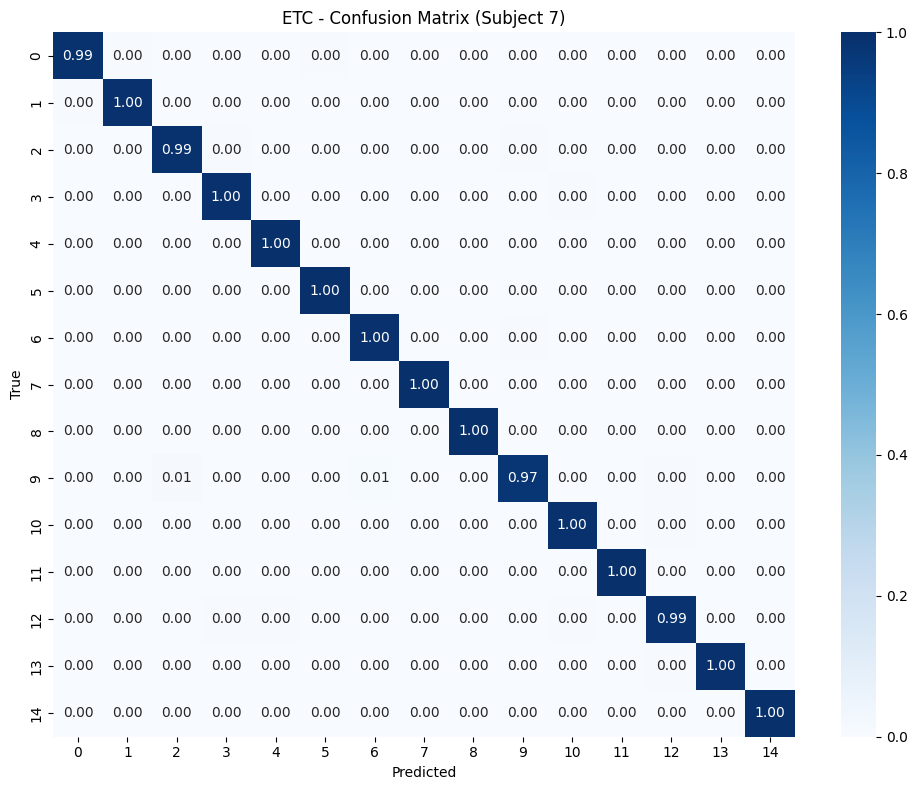

In [20]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Subject 1's data
X = Subject_features['S7']  # numpy array of shape (3465, 128)
y = Target      # numpy array of shape (3465,)     # shape (3465,)

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize classifiers
classifiers = {
    # "RF": RandomForestClassifier(random_state=42),
    # "SVM": SVC(C=1.0,kernel='linear',random_state=42),
    # "KNN": KNeighborsClassifier(n_neighbors=40,weights='distance', leaf_size=1,metric='manhattan'),
    "ETC": ExtraTreesClassifier(random_state=42)
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n=== {name} ===")
    
    # Get cross-validated predictions
    y_pred = cross_val_predict(clf, X, y, cv=kf, n_jobs=-1)
    
    # Print classification report
    print(f"Classification Report ({name}):")
    print(classification_report(y, y_pred, digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred,normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (Subject 7)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig('cm_s7')
    plt.show()